# Programando compuertas de forma bruta

En clase ya hicimos todo esto, aquí pongo mis versiones improvisadas para ilustrar algunas cosas

In [1]:
# Dictionary with Pauli matrices
sigmas = Dict(0 => [1.0 0; 0 1], 1 => [0 1; 1 0], 2 => [0 -im; im 0], 3 => [1 0; 0 -1])

Dict{Int64, Matrix} with 4 entries:
  0 => [1.0 0.0; 0.0 1.0]
  2 => Complex{Int64}[0+0im 0-1im; 0+1im 0+0im]
  3 => [1 0; 0 -1]
  1 => [0 1; 1 0]

In [56]:
function pauli(index, target, particles)
    list = []
    for i in 0:particles-1
        if i == target
            push!(list, sigmas[index])
        else
            push!(list, sigmas[0])
        end
    end
    return kron(list...)
end

pauli (generic function with 1 method)

In [63]:
pauli(1, 1, 2)

4×4 Matrix{Float64}:
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0

Operador de paridad ${\mathcal P}=\prod_i^N \sigma^x_i$

In [4]:
function parity(particles)
    list = [sigmas[1] for _ in 1:particles]
    return kron(list...)
end

parity (generic function with 1 method)

In [5]:
parity(3)

8×8 Matrix{Int64}:
 0  0  0  0  0  0  0  1
 0  0  0  0  0  0  1  0
 0  0  0  0  0  1  0  0
 0  0  0  0  1  0  0  0
 0  0  0  1  0  0  0  0
 0  0  1  0  0  0  0  0
 0  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0

In [6]:
using LinearAlgebra

In [14]:
vals, vecs = eigen(parity(2))
vals=round.(vals)

4-element Vector{Float64}:
 -1.0
 -1.0
  1.0
  1.0

Si este operador es una simetría del Hamiltoniano, podemos diagonalizar el Hamiltoniano por bloques de paridad.

In [9]:
# Para filtrar todos los eigenvectores con eigenvalor 1, hacemos lo siguiente para encontrar los índices
@show findall(vals .== 1)

findall(vals .== 1) = [3, 4]


2-element Vector{Int64}:
 3
 4

In [10]:
#O simplemente dentro de la matriz de eigenvectores
vec = vecs[:, findall(vals .== 1)]

4×2 Matrix{Float64}:
 0.0       0.707107
 0.707107  0.0
 0.707107  0.0
 0.0       0.707107

## Ejercicios

### 1
* Diagonalizar por bloques el Hamiltoniano de Ising con Js aleatorias. Es decir, teniendo los eigenvectores con un eigenvalor de paridad determinado, digamos $\{ |v_i\rangle \}$, donde ${\mathcal P}|v_i\rangle=|v_i\rangle$, el bloque del Hamiltoniano es simplemente $H^+_{i,j}=\langle v_i |H |v_j\rangle$, donde el $+$ indica que es el bloque con paridad positiva.
* Graficar de nuevo el espectro respecto al campo $b$, pero ahora con los eigenvalores de diferente paridad con diferente color (claramente tendremos solo dos colores).
### 2
* Definir el operador de _traslación_ de qubits. Es decir, considerando una cadena cerrada, definan el operador $K$ tal que $K|000100\rangle=|000010\rangle$, etc. La idea de este operador es que las etiquetas de los qubits, digamos $i$ se manden a $i\to i+1$.

In [69]:
# Generate a list of random numbers uniformly distributed around [0.9,1.0]
ϵ=0.1
particles=6
Js=2ϵ*rand(particles).+(1-ϵ)
function ClosedIsingChain(b)
    H = zeros(2^particles, 2^particles)
    for i in 0:particles-1
        H += -Js[i+1]*pauli(3, i, particles)*pauli(3, mod(i+1,particles), particles)+b*pauli(1, i, particles)
    end
    return H
end

ClosedIsingChain (generic function with 1 method)

In [100]:
list=[]
for b in 0.0:0.005:1.0
    vals, vecs = eigen(ClosedIsingChain(b))
    append!(list, map(x->[b,x],vals))
end

x_vals = [x[1] for x in list]
y_vals = [x[2] for x in list];

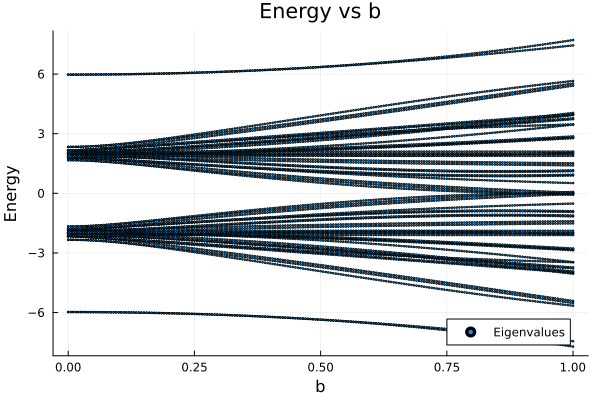

In [101]:
scatter(x_vals, y_vals, label="Eigenvalues", xlabel="b", ylabel="Energy", title="Energy vs b", legend=:bottomright,markersize=1)

In [1]:
# Primero definimos algunas funciones auxiliares que nos ayudarán a convertir de un número a una lista de bits y viceversa.
using LinearAlgebra

function original_integer(list)
    return parse(Int, join(list); base=2)
end

function base_2(integer; pad= nothing)
    if pad == nothing
        return reverse(digits(integer, base = 2))
    else
        return reverse(digits(integer, base = 2, pad = pad))
    end
end

base_2 (generic function with 1 method)

In [ ]:
function base_2(integer; pad=nothing)
    return reverse(digits(integer, base=2, pad=pad))
end

In [2]:
base_2(4)

3-element Vector{Int64}:
 1
 0
 0

In [3]:
vec = [1,2,3]
[vec[end]; vec[1:end-1]]

3-element Vector{Int64}:
 3
 1
 2

In [4]:
function rotate(index, particles)
    vec = base_2(index, pad=particles)
    return original_integer([vec[end]; vec[1:end-1]])
end

rotate (generic function with 1 method)

In [5]:
function operatorK(particles)
    K = zeros(2^particles, 2^particles)
    for i in 0:2^particles-1
        K[rotate(i, particles)+1, i+1] = 1
    end
    return K
end

operatorK (generic function with 1 method)

In [6]:
rotate(2,3)

1

In [7]:
operatorK(3)

8×8 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [38]:
vals, vecs = eigen(operatorK(12));

In [43]:
vals[1000]

-0.8660254037844397 + 0.5000000000000003im

In [44]:
rounded_vals[1000]

-0.86603 + 0.5im

In [79]:
rounded_vals = round.(vals,digits=5)
final_vals = []
for (val, round_val) in zip(vals, rounded_vals)
    if norm(round_val - val) < 1e-3
        push!(final_vals, round_val)
    else
        push!(final_vals, val)
    end
end
final_vals_unique=unique(final_vals)

14-element Vector{Any}:
     -1.0 + 0.0im
 -0.86603 - 0.5im
 -0.86603 + 0.5im
     -0.5 - 0.86603im
     -0.5 + 0.86603im
     -0.0 - 1.0im
     -0.0 + 1.0im
      0.0 - 1.0im
      0.0 + 1.0im
      0.5 - 0.86603im
      0.5 + 0.86603im
  0.86603 - 0.5im
  0.86603 + 0.5im
      1.0 + 0.0im

Parece que ``unique`` tiene un bug y no filtra el $0$ del $-0$. Una posible solución construida parcialmente con copilot:

In [80]:
# Define a tolerance for floating-point comparisons
tolerance = 1e-8

# Custom function to check if two complex numbers are approximately equal
function is_approx_equal(x, y)
    return norm(x - y) < tolerance
end

# Filter unique values using the custom comparison
filtered_vals = []
for v in vals
    if all(!is_approx_equal(v, fv) for fv in filtered_vals)
        push!(filtered_vals, v)
    end
end

function custom_unique(list)
    filtered_vals = []
    for v in list
        if all(!is_approx_equal(v, fv) for fv in filtered_vals)
            push!(filtered_vals, v)
        end
    end
    return filtered_vals
end

custom_unique (generic function with 1 method)

In [84]:
!isapprox(1.0, 1.0, atol=1e-8)

false

Ahora si ya nos da la lista correcta de eigenvalores:

In [81]:
custom_unique(rounded_vals)

12-element Vector{Any}:
     -1.0 + 0.0im
 -0.86603 - 0.5im
 -0.86603 + 0.5im
     -0.5 - 0.86603im
     -0.5 + 0.86603im
     -0.0 - 1.0im
     -0.0 + 1.0im
      0.5 - 0.86603im
      0.5 + 0.86603im
  0.86603 - 0.5im
  0.86603 + 0.5im
      1.0 + 0.0im

In [13]:
@show findall(vals .== final_vals_unique[3])

findall(vals .== final_vals_unique[3]) = [7, 8]


2-element Vector{Int64}:
 7
 8

In [12]:
#O simplemente dentro de la matriz de eigenvectores
vec = vecs[:, findall(vals .== final_vals_unique[3])]

8×2 Matrix{ComplexF64}:
 1.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im

## Ejercicio
* Diagonalizar por bloques Ising homogeneo y cerrado, y graficar las eigenenergias por sector (diferente color), como función del campo.
    * Verificar que el Hamiltoniano completo conmuta con $K$.

# Uso de bits para aplicar compuertas cuánticas eficientemente

* En lo que sigue, utilizaremos la notación de base 2: 0=[0], [1], 2=[10], 3=[11], etc, y si se usa algún _padding_, hablamos de lo siguiente: 0=[000] (en este ejemplo el padding igual a 3, es decir, siempre veremos todo con tres dígitos, usualmente se utilizará esto con fines didacticos y de claridad).
* Nota importante, independientemente de como indexe Julia, siempre contaremos los qubits de derecha a izquierda y comenzando del 0. Es decir, si tenemos 3 qubits, el de la derecha es el 0 y el de la izquierda el 2.

Como ya vimos en clase, los componentes de los estados de muchos qubits en la base computacional (la base que se construye con los eigenestados de $\sigma_z^{\otimes n}$, por ej $| 0 0 0 0 \rangle$, $| 0 0 0 1 \rangle$ etc.) están convenientemente indexados por números enteros en notación binaria, es decir, el componente tercer componente de un estado de 3 qubits (comenzando a contar desde el $0$) corresponde a 3=[011], lo cual correspondería a la amplitud de probabilidad de medir $|011\rangle$.

En clase también vimos que usualmente tendremos _indices untouched_ e _indices target_, donde los últimos son los indices relevantes donde se aplicaría una unitaria. Para controlar sobre que índices iterar utilizando solo los enteros que indexan a los vectores en Julia, es útil hacer operaciones directamente en los bits de los mismos. En la clase remota nos fuimos paso a paso con el suigente ejemplo:

In [102]:
# Primero definimos algunas funciones auxiliares que nos ayudarán a convertir de un número a una lista de bits y viceversa.
function original_integer(list)
    return parse(Int, join(list); base=2)
end

function base_2(integer; pad= nothing)
    if pad == nothing
        return reverse(digits(integer, base = 2))
    else
        return reverse(digits(integer, base = 2, pad = pad))
    end
end

base_2 (generic function with 1 method)

## Merge Two Integers

La función que queremos contruir es ``merge_two_integers``, la cual recibe 3 enteros ``merge_two_integers(a, b, mask)``, la idea es que los dígitos binarios de ``a`` se colocan en los 1s de ``mask``. 

Por ejemplo: Si la mascara es 2=[010] (mask), target es ${\color{red} 0=[0] (a)}$ y untouched es ${\color{blue} 2=[10] (b)}$, la función nos debe de regresar el entero que surge al "repartir" los indices target sobre los 1s de la mascara, y los untouched sobre los 0s. Es decir, nos debe regresar $[{\color{blue}1}{\color{red} 0}{\color{blue} 0}]=4$. Puse el 0 del target en medio y el 10 en donde están los ceros. Hay que pensar en como hacerlo eficientemente.

A continuación, veremos como serían dos iteraciones (más o menos, hay que hacerlo con cuidado). Observen también lo que hacen los bit-wise operators.

In [ ]:
mask = original_integer([0,1,1,0,0])
a = original_integer([1,1])
b = original_integer([1,0,1])
mask, a , b

(12, 3, 5)

In [ ]:
original_integer([1,1,1,0,1])

29

In [ ]:
mask & 1

0

Utilizar con lo anterior un ``if`` para revisar si toca poner un digito de $a$ o uno de $b$. En este caso toca de $b$, por supuesto.

In [ ]:
result = 0 # definimos la variable donde escribiremos lo que nos dará merge_two_integers
bit = b & 1 # Esto nos dice si el último bit de b es 1 o 0
result = result | bit # Esto nos hace que el último bit de result sea igual al último bit de b

1

In [ ]:
base_2(result, pad = 5)

5-element Vector{Int64}:
 0
 0
 0
 0
 1

In [ ]:
base_2(mask, pad = 5) # Teniendo en mente que esta es la mascara, hay que pasarnos al siguiente bit, eliminando el último bit de mask

5-element Vector{Int64}:
 0
 1
 1
 0
 0

In [ ]:
new_mask = mask >> 1
base_2(new_mask, pad = 4) # A sabiendas que eliminé un bit, uso pad = 4, recuerden que el pad es solo para visualiar, el número subyacente no cambia, es para fines ilustrativos

4-element Vector{Int64}:
 0
 1
 1
 0

Antes de proseguir, observen también que ya se utilizó el último dígito de b, por lo tanto hay que quitarlo.

In [ ]:
new_b = b >> 1
base_2(new_b, pad = 2) # A sabiendas que eliminé un bit, uso pad = 2, recuerden que el pad es solo para visualiar, el número subyacente no cambia, es para fines ilustrativos

2-element Vector{Int64}:
 1
 0

In [ ]:
new_mask & 1 # Vemos que el último bit de la máscara es también cero, por lo tanto de nuevo hay que colocar el último bit de new_b en result

0

In [ ]:
bit = new_b & 1 # El segundo bit de b es cero.

0

__Nota importante:__ En lo siguiente, hay que comparar el segundo digito de result con bit, o equivalentemente, recorrer bit por uno y comparar con result. Es decir: result en la primera iteración es 0 = [00001], el 1 a la derecha ya fue añadido de b. Ahora hay que añadir el 0 de b:

In [ ]:
result = result | bit<<1

1

In [ ]:
bit<<1, bit # En este caso no cambia nada si recorremos bit, ya que igual es cero, pero será relevante cuando el bit a agregar a result sea 1, por ejemplo:

(0, 0)

In [ ]:
1<<2 # Aquí recorremos el primer dígito de $1$ dos veces: es decir, mandamos [001] a [100]

4

El siguiente dígito a añadir es el de $a$:

In [ ]:
new_mask = mask>>2 # primero recorremos la mascara dos veces
base_2(new_mask, pad = 3)

3-element Vector{Int64}:
 0
 1
 1

In [ ]:
# Chequemos si toca a o toca b:
new_mask & 1 # Viendo la máscara, claramente toca a

1

In [ ]:
bit = a & 1 # Como no hemos usado a, no hay new_a

1

In [ ]:
result = result | bit << 2
base_2(result | bit << 2, pad = 5) # Agregamos el bit recorrido dos veces

5-element Vector{Int64}:
 0
 0
 1
 0
 1

In [ ]:
new_a = a>>1 # Como ya usamos el primer dígito de a, lo recorremos

1

In [ ]:
result

5

## Ejercicios
### 1
* Crear la función ``merge_two_integers`` utilizando los operadores bit-wise mostrados arriba.
* Testear la función y asegurarse de que funcione correctamente.
### 2
* Crear una función que se llame ``apply_qubit_unitary(u,target,particles)`` utilizando ``merge_two_integers``. Esta nueva función deberá aplicar una unitaria de $2\times 2$ al qubit target.